In [1]:
import pandas as pd
import numpy as np

# نصب پکیج

In [2]:
!pip install hazm
!pip install xlrd -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 4.6 MB/s 
     |████████████████████████████████| 233 kB 51.2 MB/s 
     |████████████████████████████████| 1.4 MB 41.2 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394486 sha256=f22b2c9ddfb259ee923474157850334d409bf879bea9f772f79f38279b1c2f11
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=153862 sha256=412d0ede34d42e2aac4946679993a77584c0ba6f7a66d17890de78535be0d963
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
Looking in indexes: ht

In [3]:
from collections import Counter
 
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]   


import math
def to_foundation(lab) : 
  foundation_labels=[]
  for a in range(len(lab)): 
    if (lab[a]==1 or lab[a]==2):
      foundation_labels.append(1)
    elif (lab[a]==3 or lab[a]==4):
      foundation_labels.append(2)
    elif (lab[a]==5 or lab[a]==6):
      foundation_labels.append(3)
    elif (lab[a]==7 or lab[a]==8):
      foundation_labels.append(4)
    elif (lab[a]==9 or lab[a]==10):
      foundation_labels.append(5)
    elif (lab[a]==11 or lab[a]==12):
      foundation_labels.append(6)
    elif (lab[a]==13 or lab[a]==14):
      foundation_labels.append(7)
    elif (lab[a]==0):
      foundation_labels.append(0)

    #elif (not type(lab[a]) == int or float):
      #foundation_labels.append(np.nan)
  return foundation_labels 

# بارگزاری فایل های مورد نیاز
لطفا فایلهای
MFD-v3.xls و pMFTC_V2.xls
را انتخاب و آپلود کنید

In [4]:
from google.colab import files
uploaded = files.upload()

Saving MFD-v3.xls to MFD-v3.xls
Saving pMFTC_V2.xlsx to pMFTC_V2.xlsx


In [149]:
#finding duplicate item in MFD

'''

xl = pd.ExcelFile('MFD-v3.xls')
f=xl.sheet_names  # see all sheet names


df = pd.DataFrame(columns=['words'])
for k,item in enumerate(f):
  df2= pd.read_excel('MFD-v3.xls', sheet_name=str(item))
  df2['foundation']=pd.Series((k+1)*np.ones(len(df2)))
  df=pd.concat([df, df2])

words=df['words'].tolist()
ind=df['foundation'].tolist()
for i,k in enumerate(words):
  if words.count(k)>1:
    indf=df['foundation'][df['words']==k].tolist()
    if len(indf)!=len(set(indf)):
      print(k)  


len(set(words))      
'''

1700

# فقط اجرا کنید

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 19 22:42:33 2022

@author: Admin
"""

from tkinter import *
import pandas as pd
import numpy as np
from termcolor import colored
from hazm import *
import re
import random


normalizer = Normalizer()
lemmatizer = Lemmatizer()
stemmer = Stemmer()

dft= pd.read_excel('pMFTC_V2.xlsx')

xl = pd.ExcelFile('MFD-v3.xls')
f=xl.sheet_names  # see all sheet names


df = pd.DataFrame(columns=['words'])
for k,item in enumerate(f):
  df2= pd.read_excel('MFD-v3.xls', sheet_name=str(item))
  df2['foundation']=pd.Series((k+1)*np.ones(len(df2)))
  df=pd.concat([df, df2])

sf=[]
for i in range(14):
    ff=df[df['foundation']==i+1]
    sf.append(ff)
    
def text_preprocessing(text):
    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)
    
    # Remove URL
    text = re.sub(r"http\S+", "", text)
    
    # Remove Hashtag
    text = re.sub(r"#\S+", "", text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove non character 
    text=re.sub(r'[\W_]+',' ', text)

   # Remove  number
    text = re.sub(" \d+", " ", text)

    output = re.sub(r'\s*[A-Za-z]+\b', '' , text)
    text = output.rstrip()

    persian = ['۰', '۱', '۲', '۳', '۴', '۵', '۶', '۷', '۸', '۹'];
    for u in persian:
        text = re.sub(u, "", text);


    text = re.sub("کووید", " ", text)
    text = re.sub("کرونا", " ", text)
    text = re.sub("ویروس", " ", text)
    
    

    return text

mfd=df['words'].values.tolist() 


def removeDuplicates(S):
  st = []
  i = 0
  while i < len(S):
      if len(st)!=0 and st[-1]==S[i]:
        i+=1
        st.pop(-1)
      else:
        st.append(S[i])
        i+=1
  return "".join(i for i in st)




def pmfd(s):
  s=text_preprocessing(s)
  n=normalizer.normalize(s)
  t1=sent_tokenize(n)

  #n.split()
  t2=word_tokenize (t1[0])
  t3=[removeDuplicates(i) for i in t2]
  print(colored('The Preprocessed text:','blue'))
  print(' '.join(t3))
  print('')   
  print('') 
  N=3
  grams = [t3[i:i+N] for i in range(len(t3)-N+1)]
 
  a1=[grams[k][0]+' '+grams[k][1]+' '+grams[k][2] for k in range(len(grams))]
  

  '''
  from nltk import ngrams

  sentence = 'this is a foo bar sentences and i want to ngramize it'

  n = 6
  sixgrams = ngrams(sentence.split(), n)

  for grams in sixgrams:
    print (grams)
    
  ''' 
  moral_words=[w  for w in t3  if ((stemmer.stem(w)in mfd) or (lemmatizer.lemmatize(w)in mfd))]+[w  for w in a1  if stemmer.stem(w) in mfd]

  f_count=[]
  for h in range (len(moral_words)):
    fo=(df[df['words']==lemmatizer.lemmatize(moral_words[h])])['foundation'].tolist()
    
    if fo:
        fz=[]
        for j in range(len(fo)):
            fz.append(fo[j])  
        f_count=[fz]+f_count
   
  flat_list = [item for sublist in f_count for item in sublist]   
  flat_list=[int(g) for g in flat_list]
  f_name=[f[g-1] for g in flat_list]
  f_dic = {i:flat_list.count(i) for i in flat_list}
  f_dict = {i:f_name.count(i) for i in f_name}

  my_dic={}
  for k in range(len(list(f_dic.keys()))):      
    hk=[]
    for a in range(len(moral_words)):
        if ((lemmatizer.lemmatize(moral_words[a]) in sf[list(f_dic.keys())[k]-1]['words'].tolist()) or (stemmer.stem(moral_words[a]) in sf[list(f_dic.keys())[k]-1]['words'].tolist()))  :
            hk=[moral_words[a]]+hk              
    my_dic[str(f[list(f_dic.keys())[k]-1])]=[hk]   
  return moral_words,f_dict,my_dic


In [6]:
def print_results(s):
  print(colored('The tweet is: ','blue'))    
  print(s)
  print('')   
  print('') 
  moral_words,f_dict,my_dic=pmfd(s)
  if(moral_words):
      
      print(colored('Moral Words:','red'))
      moral_words=[re.sub(r"\u200c\S+", "", v) for v in moral_words]
      moral_words=[v.replace('\u200c', ' ') for v in moral_words]
      
      print(str(list(set(moral_words))))
      
      print('\n')
    
      
      print(colored('Number of time each Foundation is addressed in the tweet:','red'))
      print(str(f_dict))
      print('\n')       
      
      print(colored('Foundation related words:','red'))
      print('\n')
      for i in range(len(my_dic)):
          
          dic_key = list(my_dic)[i]        
          dic_val = list(my_dic.values())[i] 
      
          print(colored(str(dic_key)+':','magenta'))
          dv=[re.sub(r"\u200c\S+", "", v) for v in dic_val[0]]
          dv=[v.replace('\u200c', ' ') for v in dv]
          print(colored(str(list(set(dv)))))
     
          
          

      
      
      print('\n'+'----------------')
      
  else:
      
      print('No MF words found!'+'\n'+'----------------')
    

# انتخاب تصادفی متن توییت



In [7]:
k=random.randint(0,len(dft))
s =dft['Tweet'][k]
print(colored('tweet #no: '+str(k),'cyan'))
print('')
print_results(s)

tweet #no: 4258

The tweet is: 
فقط نظاره گر باشید با یک دلسوزی عوام فریبانه سعی در فروش واکسن های تولیدی شرکت های جهان وطنی را به ملت ها دارند


The Preprocessed text:
فقط نظاره‌گر باشید با یک دلسوزی عوام فریبانه سعی در فروش واکسن‌های تولیدی شرکت‌های جهان وطنی را به ملت‌ها دارند


Moral Words:
['ملت', 'وطنی']


Number of time each Foundation is addressed in the tweet:
{'Loyalty_Virtue': 2}


Foundation related words:


Loyalty_Virtue:
['ملت', 'وطنی']

----------------


# پردازش متن دلخواه

In [8]:
s='   و خانواده اش مراقبت شدید خیانت ها مراقبت ها آواره  ها'
print_results(s)

The tweet is: 
   و خانواده اش مراقبت شدید خیانت ها مراقبت ها آواره  ها


The Preprocessed text:
و خانواده‌اش مراقبت شدید خیانت‌ها مراقبت‌ها آواره‌ها


Moral Words:
['خانواده', 'خیانت', 'آواره', 'مراقبت']


Number of time each Foundation is addressed in the tweet:
{'Purity_Vice': 1, 'Care_Virtue': 2, 'Loyalty_Vice': 1, 'Loyalty_Virtue': 1}


Foundation related words:


Purity_Vice:
['آواره']
Care_Virtue:
['مراقبت']
Loyalty_Vice:
['خیانت']
Loyalty_Virtue:
['خانواده']

----------------


In [9]:
ee='می پرستند'
print(stemmer.stem(ee))
print(lemmatizer.lemmatize(ee))

می پرستند
می پرستند


In [10]:
#tweets in dataset related to each foundation
Care_dat=dft.loc[dft['Label']==1]['Tweet'].tolist()
Fairness_dat=dft.loc[dft['Label']==2]['Tweet'].tolist()
Loyalty_dat=dft.loc[dft['Label']==3]['Tweet'].tolist()
Authority_dat=dft.loc[dft['Label']==4]['Tweet'].tolist()
Purity_dat=dft.loc[dft['Label']==5]['Tweet'].tolist()
Freedom_dat=dft.loc[dft['Label']==6]['Tweet'].tolist()
Qeirat_dat=dft.loc[dft['Label']==7]['Tweet'].tolist()

In [11]:
#words in MFD related to each foundation
array=[1,2]
Care_MFD=df.loc[df['foundation'].isin(array)]['words'].tolist()
array=[3,4]
Fairness_MFD=df.loc[df['foundation'].isin(array)]['words'].tolist()
array=[5,6]
Loyalty_MFD=df.loc[df['foundation'].isin(array)]['words'].tolist()
array=[7,8]
Authority_MFD=df.loc[df['foundation'].isin(array)]['words'].tolist()
array=[9,10]
Purity_MFD=df.loc[df['foundation'].isin(array)]['words'].tolist()
array=[11,12]
Freedom_MFD=df.loc[df['foundation'].isin(array)]['words'].tolist()
array=[13,14]
Qeirat_MFD=df.loc[df['foundation'].isin(array)]['words'].tolist()

print(len(Care_MFD))
print(len(Fairness_MFD))
print(len(Loyalty_MFD))
print(len(Authority_MFD))
print(len(Purity_MFD))
print(len(Freedom_MFD))
print(len(Qeirat_MFD))



len_fon_vv=[len(df[df['foundation']==1]),len(df[df['foundation']==2]),len(df[df['foundation']==3]),len(df[df['foundation']==4]),
            len(df[df['foundation']==5]),len(df[df['foundation']==6]),len(df[df['foundation']==7]),len(df[df['foundation']==8]),
            len(df[df['foundation']==9]),len(df[df['foundation']==10]),len(df[df['foundation']==11]),len(df[df['foundation']==12]),
            len(df[df['foundation']==13]),len(df[df['foundation']==14])]
len_fon=[len(Care_MFD),len(Fairness_MFD),len(Loyalty_MFD),len(Authority_MFD),len(Purity_MFD),len(Freedom_MFD),len(Qeirat_MFD)]

374
182
181
318
455
197
80


In [12]:
print(len(df[df['foundation']==1]))
print(len(df[df['foundation']==2]))
print(len(df[df['foundation']==3]))
print(len(df[df['foundation']==4]))
print(len(df[df['foundation']==5]))
print(len(df[df['foundation']==6]))
print(len(df[df['foundation']==7]))
print(len(df[df['foundation']==8]))
print(len(df[df['foundation']==9]))
print(len(df[df['foundation']==10]))
print(len(df[df['foundation']==11]))
print(len(df[df['foundation']==12]))
print(len(df[df['foundation']==13]))
print(len(df[df['foundation']==14]))

102
272
73
109
109
72
216
102
226
229
79
118
58
22


In [13]:
def moral_words(s):                      #extracting  foundations which indicated indicated in sentence
  s=text_preprocessing(s)
  n=normalizer.normalize(s)
  t1=sent_tokenize(n)

  #n.split()
  t2=word_tokenize (t1[0])
  t3=[removeDuplicates(i) for i in t2]
  '''
  print(colored('The Preprocessed text:','blue'))
  print(' '.join(t3))
  print('')   
  print('') 
  '''
  N=3
  grams = [t3[i:i+N] for i in range(len(t3)-N+1)]

  a1=[grams[k][0]+' '+grams[k][1]+' '+grams[k][2] for k in range(len(grams))]

  moral_words=[w  for w in t3  if ((stemmer.stem(w)in mfd) or (lemmatizer.lemmatize(w)in mfd))]+[w  for w in a1  if stemmer.stem(w) in mfd]

  f_count=[]
  for h in range (len(moral_words)):
    fo=(df[df['words']==lemmatizer.lemmatize(moral_words[h])])['foundation'].tolist()
    
    if fo:
        fz=[]
        for j in range(len(fo)):
            fz.append(fo[j])  
        f_count=[fz]+f_count


  flat_list = [item for sublist in f_count for item in sublist]   
  flat_list=[int(g) for g in flat_list]

  return flat_list





from collections import Counter
 
def most_frequent(List):
    occurence_count = Counter(List)
    if not occurence_count:
      mc=0
    else:
      mc=occurence_count.most_common(1)[0][0]
    return mc

In [14]:
moral_words(Care_dat[1421])

[9]

Prediction with bag of word (counting MF related words and max voting)



In [15]:

def bow(dat): 
  t=[]                                        
  res=list(map(moral_words,dat))
  
  # percentage of predicted class with most frequent
  pred_clas=list(map(most_frequent,res))
   
  return pred_clas
  

In [16]:
labb=dft.Label.values.tolist()
tww=dft.Tweet.values.tolist()

In [ ]:
predicted_with_bow=bow(tww)
pred_foundation_with_bow=to_foundation(predicted_with_bow)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labb, pred_foundation_with_bow))
 

              precision    recall  f1-score   support

           0       0.53      0.33      0.40      1873
           1       0.61      0.44      0.51      2059
           2       0.51      0.33      0.40       864
           3       0.34      0.47      0.39       461
           4       0.18      0.50      0.26       395
           5       0.17      0.56      0.27       181
           6       0.09      0.36      0.14        99
           7       0.54      0.53      0.53        66

    accuracy                           0.40      5998
   macro avg       0.37      0.44      0.36      5998
weighted avg       0.50      0.40      0.42      5998



In [28]:
import numpy as np
import matplotlib.pyplot as plt
import re

def ratio(dat,ss):                                         
  res=list(map(moral_words,dat))
  
  # percentage of predicted class with most frequent
  pred_clas=list(map(most_frequent,res))
  mm = {i:pred_clas.count(i) for i in pred_clas}
  m=np.zeros(15)
  for k in range(15):
    if k in mm:
      m[k]=mm[k]

  print (m)

  total_len=len(dat)
  
  '''
  # percentage of dictionary foundation related words
  flat_res = [item for sublist in res for item in sublist]  
  m=Counter(flat_res)
  total_len=len(flat_res)
  '''
  


  c_p=(m[1]+m[2])/total_len
  f_p=(m[3]+m[4])/total_len
  l_p=(m[5]+m[6])/total_len
  a_p=(m[7]+m[8])/total_len
  p_p=(m[9]+m[10])/total_len
  fr_p=(m[11]+m[12])/total_len
  q_p=(m[13]+m[14])/total_len





  courses = ['Care','Fairness','Loyalty','Authority','Purity','Freedom','Qeirat']
  values = [c_p*100,f_p*100,l_p*100,a_p*100,p_p*100,fr_p*100,q_p*100]

  fig = plt.figure(figsize = (10, 5))

  # creating the bar plot
  plt.bar(courses, values)

  plt.xlabel("Moral Foundations")
  plt.ylabel("Percentage of predicted Foundations ")

  plt.title(ss)
  plt.show()
  return pred_clas


[ 6. 12.  6.  4.  2.  5.  0. 15.  4.  6.  3. 11. 25.  0.  0.]


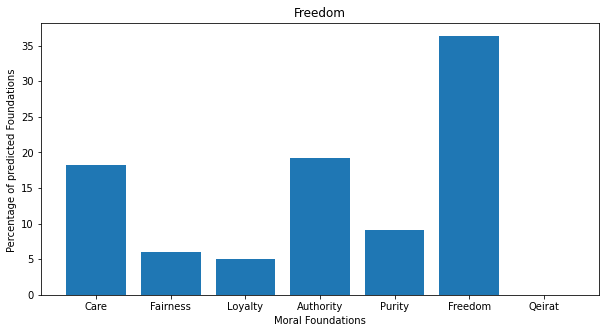

In [29]:
pred_clas=ratio(Freedom_dat,'Freedom')


In [ ]:
i=7
r1,r2,r3=pmfd(Fairness_dat[i])
print(r1)
print(pred_clas[i])

The Preprocessed text:
وکالت کسب و کار نیست نیاز به تخ تعهد و دانش دارد مجمع نمایندگان استان خوزستان اجازه ندهند با این طرح عدالت


['تعهد', 'مجمع', 'اجازه', 'عدالت']
1


Classification with bag of words feature obtained with counting foundation related words in each tweet

In [ ]:
tw=dft.Tweet.values
lab=dft.Label.values

In [ ]:
from tqdm import tqdm
def extrac_feat(dat):      #extracting most  founadtions indicated in each tweet of dataset
  all_feat=[]
  for p in tqdm(range(len(dat))):
    feat=np.zeros(15)
    for k in range(15):
      feat[k]=Counter(moral_words(dat[p]))[k]
    #print(feat) 
    all_feat.append(feat) 
  return all_feat  



In [ ]:
x_feat=extrac_feat(tw)

100%|██████████| 5998/5998 [05:47<00:00, 17.25it/s]


In [ ]:
final_feat=[]
for k in tqdm(range(len(x_feat))):
  ll=x_feat[k]
  morality=ll[0]
  l=np.delete(ll, [0], None)
  n_l=l.reshape(-1,2).sum(axis=1)
  n_l=n_l.tolist()
  n_l=[morality]+n_l
  final_feat.append(n_l)


100%|██████████| 5998/5998 [00:00<00:00, 56237.59it/s]


In [ ]:
final_feat_without=[(np.delete(k, [0], None)).tolist() for k in final_feat]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_feat_without, lab, test_size=0.1, random_state=42)

In [ ]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo').fit(x_train, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression

#clf = LogisticRegression(random_state=0).fit(x_train, y_train)


In [ ]:
print('Classification Report for multiclass')
print()
from sklearn.metrics import classification_report
y_pred=clf.predict(x_test)
print(classification_report(y_test, y_pred))

Classification Report for multiclass

              precision    recall  f1-score   support

           0       0.38      0.57      0.46       174
           1       0.48      0.46      0.47       212
           2       0.54      0.37      0.44        83
           3       0.42      0.49      0.45        49
           4       0.62      0.18      0.28        44
           5       0.33      0.05      0.09        20
           6       0.00      0.00      0.00        11
           7       0.33      0.29      0.31         7

    accuracy                           0.44       600
   macro avg       0.39      0.30      0.31       600
weighted avg       0.45      0.44      0.42       600



In [ ]:
#per class binary classifier

foun=0      #change for different foundations
 
ff_1=[final_feat[k] for k in range(len(final_feat)) if lab[k]==foun]
ff_0=[final_feat[k] for k in range(len(final_feat)) if lab[k]!=foun]
ff=ff_0+ff_1
lab_ff_1=np.ones(len(ff_1)).tolist()
lab_ff_0=np.zeros(len(ff_0)).tolist()
lab_ff=lab_ff_0+lab_ff_1

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler(random_state=0)
#rus=  RandomOverSampler(random_state=0)

X_resampled, y_resampled = rus.fit_resample(ff, lab_ff)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

print(sorted(Counter(y_resampled).items()))
print()



clf = LogisticRegression(random_state=0).fit(x_train, y_train)


print('Classification Report for class: '+str(foun))
print()
from sklearn.metrics import classification_report
y_pred=clf.predict(x_test)
print(classification_report(y_test, y_pred))

[(0.0, 1873), (1.0, 1873)]

Classification Report for class: 0

              precision    recall  f1-score   support

         0.0       0.69      0.49      0.57       195
         1.0       0.58      0.77      0.66       180

    accuracy                           0.62       375
   macro avg       0.64      0.63      0.62       375
weighted avg       0.64      0.62      0.61       375



In [ ]:
'''
#per class binary classifier

foun=0         #change for different foundations
 

ff=[final_feat[k][foun] for k in range(len(final_feat))]
lab_ff=np.zeros(len(final_feat))
for k in range(len(final_feat)) :
  if lab[k]==foun:                                    
    lab_ff[k]=1 

ff=np.asarray(ff).reshape(-1, 1)

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler(random_state=0)
#rus=  RandomOverSampler(random_state=0)

X_resampled, y_resampled = rus.fit_resample(ff, lab_ff)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

print(sorted(Counter(y_resampled).items()))
print()



clf = LogisticRegression(random_state=0).fit(x_train, y_train)


print('Classification Report for class: '+str(foun))
print()
from sklearn.metrics import classification_report
y_pred=clf.predict(x_test)
print(classification_report(y_test, y_pred))

'''

[(0.0, 1873), (1.0, 1873)]

Classification Report for class: 0

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       195
         1.0       0.48      1.00      0.65       180

    accuracy                           0.48       375
   macro avg       0.24      0.50      0.32       375
weighted avg       0.23      0.48      0.31       375



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(Dictionary word related/all words of tweet) ratio

In [20]:
def feat_vecc(p,res):
  h=np.zeros(14)
  
  v=Counter(res[p])
  for k in range(len(list(set(v)))):
    h[list(set(v))[k]-1]=v[list(set(v))[k]]
  return h  

 #extract feature vector for foundation related count 
def extra_fe(dat):
  res=list(map(moral_words,dat))
  all_fea=[]
  for p in range(len(res)):
    all_fea.append(feat_vecc(p,res))
  tweet_len=[len(word_tokenize(text_preprocessing(dat[g]))) for g in range(len(dat))]  
    
  return all_fea  ,tweet_len

In [21]:
Care_dat=dft.loc[dft['Label']==1]['Tweet'].tolist()
Fairness_dat=dft.loc[dft['Label']==2]['Tweet'].tolist()
Loyalty_dat=dft.loc[dft['Label']==3]['Tweet'].tolist()
Authority_dat=dft.loc[dft['Label']==4]['Tweet'].tolist()
Purity_dat=dft.loc[dft['Label']==5]['Tweet'].tolist()
Freedom_dat=dft.loc[dft['Label']==6]['Tweet'].tolist()
Qeirat_dat=dft.loc[dft['Label']==7]['Tweet'].tolist()

In [139]:
fo='Qeirat'
va=fo+'_dat'
va=locals()[va]
ff,tweet_len=extra_fe(va)

ff_n=[]
for k in range(len(ff)):
  ff_n.append([1000*ff[k][j]/(tweet_len[k]*len_fon_vv[j]) for j in range(14)])


#q=[j.reshape(-1,2).sum(axis=1) for j in ff]
qq=[(ff[j].reshape(-1,2).sum(axis=1))/tweet_len[j] for j in range(len(ff))]

qq_n=[]
for k in range(len(qq)):
   qq_n.append([1000*qq[k][j]/len_fon[j] for j in range(7)])

In [140]:

'''
res=list(map(moral_words,Freedom_dat))
r=51
print(res[r])
print(q[r])
print(qq[r])
'''

'\nres=list(map(moral_words,Freedom_dat))\nr=51\nprint(res[r])\nprint(q[r])\nprint(qq[r])\n'

In [141]:

#mean of ((dictionary related word)/(total lenght of tweet) for each foundation for Virtue and Vice
mu_vv=[]
for z in range(14):
  mu_vv.append(np.asarray(ff_n)[:,z])

In [142]:
tdata_vv = pd.DataFrame({'Care_Virtue':mu_vv[0],'Care_Vice':mu_vv[1],'Fairness_Virtue':mu_vv[2],'Fairness_Vice':mu_vv[3],
                         'Loyalty_Virtue':mu_vv[4],'Loyalty_Vice':mu_vv[5],'Authority_Virtue':mu_vv[6],'Authority_Vice':mu_vv[7],
                         'Purity_Virtue':mu_vv[8],'Purity_Vice':mu_vv[9],'Freedom_Virtue':mu_vv[10],'Freedom_Vice':mu_vv[11],
                         'Qeirat_Virtue':mu_vv[12],'Qeirat_Vice':mu_vv[13]})
                        
tdata_vv.index = range(0,len(ff))
tdata_vv.describe()

,Care_Virtue,Care_Vice,Fairness_Virtue,Fairness_Vice,Loyalty_Virtue,Loyalty_Vice,Authority_Virtue,Authority_Vice,Purity_Virtue,Purity_Vice,Freedom_Virtue,Freedom_Vice,Qeirat_Virtue,Qeirat_Vice
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.0
mean,0.046124,0.026603,0.048610,0.027142,0.122833,0.034722,0.037504,0.055355,0.070682,0.010115,0.059511,0.051760,1.310237,0.0
std,0.151553,0.064273,0.196508,0.109821,0.312060,0.163430,0.096999,0.186521,0.172219,0.046762,0.262629,0.144247,1.233373,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.689655,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149425,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.684953,0.0
max,0.700280,0.229779,0.978474,0.573394,1.310616,0.868056,0.514403,1.031992,1.106195,0.229832,1.687764,0.605327,5.747126,0.0


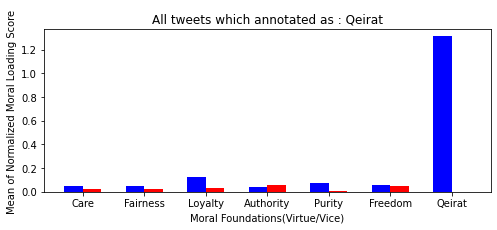

In [143]:
x = tdata_vv.describe().loc['mean'].keys()
y = [tdata_vv.describe().loc['mean'][u] for u in range(14)]
y1=[y[i] for i in range(0,14,2)]
y2=[y[i] for i in range(1,14,2)]
wid=0.15
plt.figure(figsize=(8, 3))
x = np.arange(7)
# creating the bar plot
plt.bar(x-wid, y1, color ='blue',
        width = 2*wid)
plt.bar(x+wid, y2, color ='red',
        width = 2*wid)
plt.xticks(x, ['Care', 'Fairness', 'Loyalty', 'Authority', 'Purity', 'Freedom', 'Qeirat'])

plt.xlabel("Moral Foundations(Virtue/Vice)")

plt.ylabel("Mean of Normalized Moral Loading Score ")   #(Normalized Moral Loading Score=1000*Foundation_related_words/total_Foundation_words*tweet_size)
plt.title("All tweets which annotated as : "+fo)
plt.show()

In [144]:
#mean of ((dictionary related word)/(total lenght of tweet) for each foundation
mu=[]
for z in range(7):
  mu.append(np.asarray(qq_n)[:,z])

In [145]:
from scipy.stats import f_oneway
f_oneway(mu[0],mu[1],mu[2],mu[3],mu[4],mu[5],mu[6])

F_onewayResult(statistic=60.627413555519055, pvalue=4.7058433694070696e-55)

In [146]:
tdata = pd.DataFrame({'Care':mu[0], 'Fairness':mu[1], 'Loyalty':mu[2], 'Authority':mu[3], 'Purity':mu[4], 'Freedom':mu[5], 'Qeirat':mu[6]})
tdata.index = range(0,len(ff))
tdata

,Care,Fairness,Loyalty,Authority,Purity,Freedom,Qeirat
0,0.000000,0.0,0.0,0.000000,0.000000,0.362582,0.892857
1,0.000000,0.0,0.0,0.209644,0.000000,0.676819,0.000000
2,0.116252,0.0,0.0,0.000000,0.000000,0.441404,0.000000
3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.562500
4,0.000000,0.0,0.0,0.000000,0.087912,0.000000,0.000000
...,...,...,...,...,...,...,...
61,0.106952,0.0,0.0,0.000000,0.000000,0.000000,0.500000
62,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.562500
63,0.140726,0.0,0.0,0.165508,0.231348,0.267165,0.657895
64,0.106952,0.0,0.0,0.125786,0.087912,0.203046,0.500000


In [147]:
tdata.describe()

,Care,Fairness,Loyalty,Authority,Purity,Freedom,Qeirat
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.031927,0.035753,0.087784,0.043229,0.040199,0.054868,0.949922
std,0.061765,0.111660,0.193565,0.087352,0.091279,0.130594,0.894196
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.833333
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.221591
max,0.232504,0.578369,0.789266,0.349406,0.549451,0.676819,4.166667


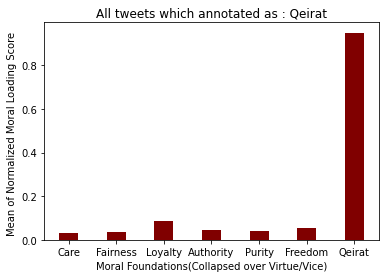

In [148]:

x = tdata.describe().loc['mean'].keys()
y = [(tdata.describe().loc['mean'][u]) for u in range(7)]

 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)
 
plt.xlabel("Moral Foundations(Collapsed over Virtue/Vice)")

plt.ylabel("Mean of Normalized Moral Loading Score ")   #(Normalized Moral Loading Score=1000*Foundation_related_words/total_Foundation_words*tweet_size)

plt.title("All tweets which annotated as : "+fo)

plt.show()

one way anova to find difference between MFD related words in each set of tweets

In [ ]:
import scipy as sp
import csv # when you need to read csv data
from scipy import stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.anova as anova #for ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd #for Tukey's multiple comparisons

In [ ]:
sa=50
f, p = st.f_oneway(tdata['Care'].sample(sa),tdata['Fairness'].sample(sa),tdata['Loyalty'].sample(sa)
,tdata['Authority'].sample(sa),tdata['Purity'].sample(sa),tdata['Freedom'].sample(sa),tdata['Qeirat'].sample(sa))
print("F=%f, p-value = %f"%(f,p))

F=40.292271, p-value = 0.000000


In [ ]:
def tukey_hsd(group_names , *args ):
    endog = np.hstack(args)
    groups_list = []
    for i in range(len(args)):
        for j in range(len(args[i])):
            groups_list.append(group_names[i])
    groups = np.array(groups_list)
    res = pairwise_tukeyhsd(endog, groups)
    print (res.pvalues) #print only p-value
    print(res) #print result

In [ ]:
sam=sa
print(tukey_hsd(['Care', 'Fairness', 'Loyalty','Authority','Purity','Freedom','Qeirat'],
                tdata['Care'].sample(sam),tdata['Fairness'].sample(sam),tdata['Loyalty'].sample(sam),
                tdata['Authority'].sample(sam),tdata['Purity'].sample(sam),tdata['Freedom'].sample(sam),tdata['Qeirat'].sample(sam)))

[0.9   0.9   0.9   0.9   0.9   0.001 0.9   0.9   0.9   0.9   0.001 0.9
 0.9   0.9   0.001 0.9   0.9   0.001 0.9   0.001 0.001]
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2  meandiff p-adj  lower  upper  reject
-------------------------------------------------------
Authority     Care  -0.0023   0.9 -0.2023 0.1977  False
Authority Fairness   0.0084   0.9 -0.1915 0.2084  False
Authority  Freedom   0.0337   0.9 -0.1663 0.2336  False
Authority  Loyalty   0.0325   0.9 -0.1675 0.2325  False
Authority   Purity   0.0002   0.9 -0.1997 0.2002  False
Authority   Qeirat   0.8926 0.001  0.6926 1.0925   True
     Care Fairness   0.0108   0.9 -0.1892 0.2107  False
     Care  Freedom    0.036   0.9  -0.164 0.2359  False
     Care  Loyalty   0.0348   0.9 -0.1652 0.2348  False
     Care   Purity   0.0026   0.9 -0.1974 0.2025  False
     Care   Qeirat   0.8949 0.001  0.6949 1.0948   True
 Fairness  Freedom   0.0252   0.9 -0.1747 0.2252  False
 Fairness  Loyalty    0.024   0.9

Dataset analysis

In [ ]:
dft= pd.read_excel('pMFTC_V2.xlsx')
len(dft)

5998

In [ ]:
print('Number of tweets not related to any foundation  is '+str(len(dft[dft['Label']==0])) )

for k in range(1,8):
  print('Number of tweets related to #'+str(k)+' foundation is '+str(len(dft[dft['Label']==k])) )


Number of tweets not related to any foundation  is 1873
Number of tweets related to #1 foundation is 2059
Number of tweets related to #2 foundation is 864
Number of tweets related to #3 foundation is 461
Number of tweets related to #4 foundation is 395
Number of tweets related to #5 foundation is 181
Number of tweets related to #6 foundation is 99
Number of tweets related to #7 foundation is 66


In [ ]:
#Correction for bad freedom tags in dataset


'''
freedom_labeled_data=dft[dft['Label']==6]
freedom_labeled_tweets=freedom_labeled_data['Tweet']
fr_index=freedom_labeled_tweets.index[:].tolist()

dft_without_fr=dft.drop(fr_index,axis=0,inplace=False)
dc_z=pd.read_excel('double_check_zandi (1).xlsx')
dc_n=pd.read_excel('double_check_nabi (1).xlsx')
dc_t=pd.read_excel('double_check_torkaman (1).xlsx')
p1_z=dc_z['p1']
p1_n=dc_n['p1']
p1_t=dc_t['p1']
nrw_lab=[Counter([p1_z[k],p1_n[k],p1_t[k]]).most_common()[0][0] for k in range(212)]
new_lab=to_foundation(nrw_lab)
nd={'Tweet':freedom_labeled_tweets.tolist(),'Label':new_lab}
review_fr=df.from_dict(nd)
new_pmftc=pd.concat([review_fr,dft_without_fr],axis=0)
new_pmftc.to_excel('pMFTC_V2.xlsx', header=True, index=False)
from google.colab import files
files.download('pMFTC_V2.xlsx')

'''

"\nfreedom_labeled_data=dft[dft['Label']==6]\nfreedom_labeled_tweets=freedom_labeled_data['Tweet']\nfr_index=freedom_labeled_tweets.index[:].tolist()\n\ndft_without_fr=dft.drop(fr_index,axis=0,inplace=False)\ndc_z=pd.read_excel('double_check_zandi (1).xlsx')\ndc_n=pd.read_excel('double_check_nabi (1).xlsx')\ndc_t=pd.read_excel('double_check_torkaman (1).xlsx')\np1_z=dc_z['p1']\np1_n=dc_n['p1']\np1_t=dc_t['p1']\nnrw_lab=[Counter([p1_z[k],p1_n[k],p1_t[k]]).most_common()[0][0] for k in range(212)]\nnew_lab=to_foundation(nrw_lab)\nnd={'Tweet':freedom_labeled_tweets.tolist(),'Label':new_lab}\nreview_fr=df.from_dict(nd)\nnew_pmftc=pd.concat([review_fr,dft_without_fr],axis=0)\nnew_pmftc.to_excel('pMFTC_V2.xlsx', header=True, index=False)\nfrom google.colab import files\nfiles.download('pMFTC_V2.xlsx')\n\n"

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
'''
freedom_labeled_tweets.to_excel('double_check.xlsx', header=True, index=False)
from google.colab import files
files.download('double_check.xlsx')
'''

"\nfreedom_labeled_tweets.to_excel('double_check.xlsx', header=True, index=False)\nfrom google.colab import files\nfiles.download('double_check.xlsx')\n"